# xy_png_to_gif
+ Create animation of xy chart using `matplotlib` and `imageio` libraries.
+ See [Basics of GIFs with Python’s Matplotlib](https://towardsdatascience.com/54dd544b6f30) by Thiago Carvalho.

In [1]:
import math

# create data for ploting
N = 100
xbeg = 0
xend = 2
dx = (xend - xbeg) / N
x = [xbeg + i * dx for i in range(0, N + 1)]

l = (xend - xbeg) / 2
k = 2 * math.pi / l
y = [math.sin(k * i) for i in x]

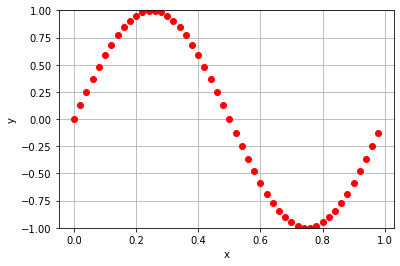

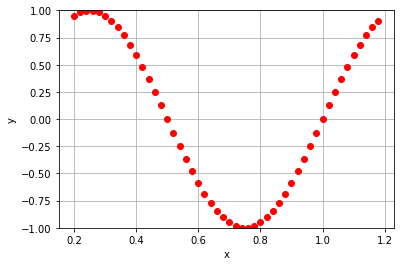

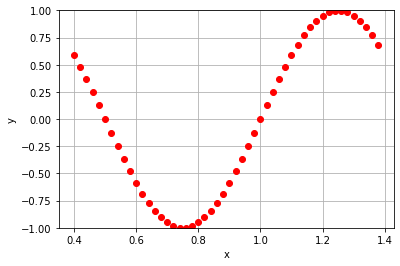

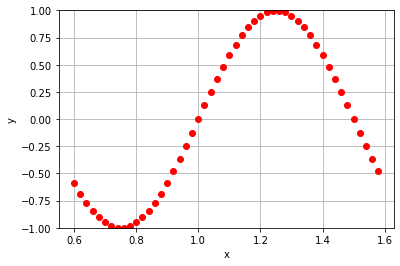

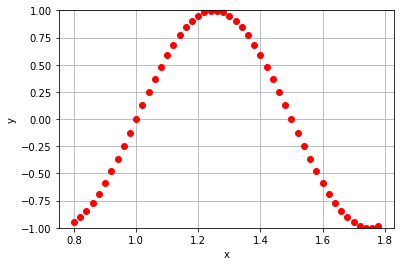

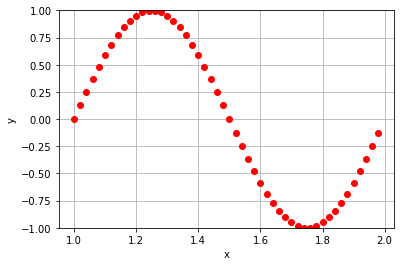

In [2]:
import matplotlib.pyplot as plt

N = 50
fns = []
for i in range(0, 60, 10):
    fn = f"data/xy{i:02d}.png"
    fns.append(fn)
    xx = x[i:i+N]
    yy = y[i:i+N]

    plt.grid()
    plt.ylim(-1, 1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(xx, yy, 'ro')
    plt.savefig(fn, facecolor='white', transparent=False)
    plt.show()


In [4]:
import imageio
import imageio.v2 as iio
with imageio.get_writer('data/xy2.gif', mode='I') as writer:
    for filename in fns:
        image = iio.imread(filename)
        writer.append_data(image)

![](data/xy.gif)